In [99]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [100]:
# Load dataset
twitter_data = pd.read_csv('../../data/data_collected_ref_cleaned/2_first_solar_tweets_cleaned_v2_small.csv')

In [101]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,First Solar Completes Sale of North American OampM Business to NovaSource FSLR httpstcojlkOFos,"['first', 'solar', 'completes', 'sale', 'of', 'north', 'american', 'oampm', 'business', 'to', 'n...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...","['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ..."
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fun...,"['alyi', 'to', 'reveal', 'new', 'significant', 'investment', 'in', 'company', 'from', 'leading',...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...","['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '..."
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,SolarPowerEU renewableHEU EUCommission AkuoEnergy enelgreenpower EdpRenewables Enapter FirstSola...,"['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'..."
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,FSLR sector move confirmed httpstcohDwnCIF,"['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']"
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,FSLR NovaSource Power Services is Worlds Largest Solar OampM Provider with Acquisition of First ...,"['fslr', 'novasource', 'power', 'services', 'is', 'worlds', 'largest', 'solar', 'oampm', 'provid...","['fslr', 'novasource', 'power', 'services', 'worlds', 'largest', 'solar', 'oampm', 'provider', '...","['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...","['fslr', 'novasource', 'power', 'service', 'world', 'largest', 'solar', 'oampm', 'provider', 'ac..."


In [102]:
# datetime = pd.to_datetime(twitter_data['CreatedAt'])


In [103]:
import dateutil.parser
print(dateutil.parser.isoparse('2008-09-03T20:56:35.450686Z'))


2008-09-03 20:56:35.450686+00:00


In [104]:
# twitter_data['datetest'] = dateutil.parser.isoparse((twitter_data['CreatedAt']))
twitter_data_date_test = twitter_data['CreatedAt'][0]
twitter_data_date_test
print(dateutil.parser.isoparse(twitter_data_date_test))

2021-04-01 00:50:05+00:00


In [105]:
# twitter_data.head()
def change_time_type(createdAtAtribute):
    changed_time = dateutil.parser.isoparse(createdAtAtribute)
    return changed_time

In [106]:
# testing = change_time_type(twitter_data['CreatedAt'][0])
print(twitter_data['CreatedAt'])
print(change_time_type(twitter_data['CreatedAt'][0]))

0      2021-04-01T00:50:05.000Z
1      2021-03-31T23:54:00.000Z
2      2021-03-31T23:47:40.000Z
3      2021-03-31T23:31:00.000Z
4      2021-03-31T23:29:07.000Z
                 ...           
992    2021-03-06T17:27:08.000Z
993    2021-03-06T15:48:21.000Z
994    2021-03-06T15:15:00.000Z
995    2021-03-06T15:14:01.000Z
996    2021-03-06T15:10:05.000Z
Name: CreatedAt, Length: 997, dtype: object
2021-04-01 00:50:05+00:00


In [109]:
twitter_data['created_datetime'] = twitter_data['CreatedAt'].apply(lambda x: change_time_type(x))
print(type(twitter_data['CreatedAt'][0]))

<class 'str'>


In [110]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,created_datetime
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,First Solar Completes Sale of North American OampM Business to NovaSource FSLR httpstcojlkOFos,"['first', 'solar', 'completes', 'sale', 'of', 'north', 'american', 'oampm', 'business', 'to', 'n...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...","['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...",2021-04-01 00:50:05+00:00
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fun...,"['alyi', 'to', 'reveal', 'new', 'significant', 'investment', 'in', 'company', 'from', 'leading',...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...","['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...",2021-03-31 23:54:00+00:00
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,SolarPowerEU renewableHEU EUCommission AkuoEnergy enelgreenpower EdpRenewables Enapter FirstSola...,"['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...",2021-03-31 23:47:40+00:00
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,FSLR sector move confirmed httpstcohDwnCIF,"['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,FSLR NovaSource Power Services is Worlds Largest Solar OampM Provider with Acquisition of First ...,"['fslr', 'novasource', 'power', 'services', 'is', 'worlds', 'largest', 'solar', 'oampm', 'provid...","['fslr', 'novasource', 'power', 'services', 'worlds', 'largest', 'solar', 'oampm', 'provider', '...","['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...","['fslr', 'novasource', 'power', 'service', 'world', 'largest', 'solar', 'oampm', 'provider', 'ac...",2021-03-31 23:29:07+00:00


In [111]:
twitter_data['week_year'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d" % (x.week, x.year))

<ipython-input-111-efb7b1453d23>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  twitter_data['week_year'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d" % (x.week, x.year))


In [112]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,created_datetime,week_year
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,First Solar Completes Sale of North American OampM Business to NovaSource FSLR httpstcojlkOFos,"['first', 'solar', 'completes', 'sale', 'of', 'north', 'american', 'oampm', 'business', 'to', 'n...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...","['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...",2021-04-01 00:50:05+00:00,13/2021
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fun...,"['alyi', 'to', 'reveal', 'new', 'significant', 'investment', 'in', 'company', 'from', 'leading',...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...","['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...",2021-03-31 23:54:00+00:00,13/2021
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,SolarPowerEU renewableHEU EUCommission AkuoEnergy enelgreenpower EdpRenewables Enapter FirstSola...,"['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...",2021-03-31 23:47:40+00:00,13/2021
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,FSLR sector move confirmed httpstcohDwnCIF,"['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00,13/2021
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,FSLR NovaSource Power Services is Worlds Largest Solar OampM Provider with Acquisition of First ...,"['fslr', 'novasource', 'power', 'services', 'is', 'worlds', 'largest', 'solar', 'oampm', 'provid...","['fslr', 'novasource', 'power', 'services', 'worlds', 'largest', 'solar', 'oampm', 'provider', '...","['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...","['fslr', 'novasource', 'power', 'service', 'world', 'largest', 'solar', 'oampm', 'provider', 'ac...",2021-03-31 23:29:07+00:00,13/2021


In [122]:
twitter_data.groupby(['week_year']).size()

week_year
10/2021    375
11/2021    169
12/2021    250
13/2021    181
9/2021      22
dtype: int64

In [127]:
# twitter_data['day'] = twitter_data['created_datetime'].apply(lambda x: "%d" % (x.day))
twitter_data['day_week_year'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d/%d" % (x.day, x.week, x.year))

<ipython-input-127-35f05b1e5b04>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  twitter_data['day_week_year'] = twitter_data['created_datetime'].apply(lambda x: "%d/%d/%d" % (x.day, x.week, x.year))


In [216]:
twitter_data.head()

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,created_datetime,week_year,day,day_week_year
0,2021-04-01T00:50:05.000Z,1377422984751775755,1134049078424162304,First Solar Completes Sale of North American O&amp;M Business to NovaSource $FSLR https://t.co/j...,First Solar Completes Sale of North American OampM Business to NovaSource FSLR httpstcojlkOFos,"['first', 'solar', 'completes', 'sale', 'of', 'north', 'american', 'oampm', 'business', 'to', 'n...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...","['first', 'solar', 'complet', 'sale', 'north', 'american', 'oampm', 'busi', 'novasourc', 'fslr',...","['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', ...",2021-04-01 00:50:05+00:00,1,1,1/13/2021
1,2021-03-31T23:54:00.000Z,1377408871212351489,586116334,$ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fu...,ALYI To Reveal New Significant Investment In Company From Leading Texas Based Private Equity Fun...,"['alyi', 'to', 'reveal', 'new', 'significant', 'investment', 'in', 'company', 'from', 'leading',...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...","['alyi', 'reveal', 'new', 'signific', 'invest', 'compani', 'lead', 'texa', 'base', 'privat', 'eq...","['alyi', 'reveal', 'new', 'significant', 'investment', 'company', 'leading', 'texas', 'based', '...",2021-03-31 23:54:00+00:00,31,31,31/13/2021
2,2021-03-31T23:47:40.000Z,1377407278056230912,1313171678625701889,@SolarPowerEU @renewableH2EU @EU_Commission @Akuo_Energy @enelgreenpower @EdpRenewables @Enapter...,SolarPowerEU renewableHEU EUCommission AkuoEnergy enelgreenpower EdpRenewables Enapter FirstSola...,"['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...","['solarpowereu', 'renewableheu', 'eucommiss', 'akuoenergi', 'enelgreenpow', 'edprenew', 'enapt',...","['solarpowereu', 'renewableheu', 'eucommission', 'akuoenergy', 'enelgreenpower', 'edprenewables'...",2021-03-31 23:47:40+00:00,31,31,31/13/2021
3,2021-03-31T23:31:00.000Z,1377403081005150211,831801503694336000,$FSLR sector move confirmed https://t.co/h08Dwn5CIF,FSLR sector move confirmed httpstcohDwnCIF,"['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirm', 'httpstcohdwncif']","['fslr', 'sector', 'move', 'confirmed', 'httpstcohdwncif']",2021-03-31 23:31:00+00:00,31,31,31/13/2021
4,2021-03-31T23:29:07.000Z,1377402607010902019,1355194932445786112,$FSLR NovaSource Power Services is World's Largest Solar O&amp;M Provider with Acquisition of Fi...,FSLR NovaSource Power Services is Worlds Largest Solar OampM Provider with Acquisition of First ...,"['fslr', 'novasource', 'power', 'services', 'is', 'worlds', 'largest', 'solar', 'oampm', 'provid...","['fslr', 'novasource', 'power', 'services', 'worlds', 'largest', 'solar', 'oampm', 'provider', '...","['fslr', 'novasourc', 'power', 'servic', 'world', 'largest', 'solar', 'oampm', 'provid', 'acquis...","['fslr', 'novasource', 'power', 'service', 'world', 'largest', 'solar', 'oampm', 'provider', 'ac...",2021-03-31 23:29:07+00:00,31,31,31/13/2021


In [217]:
twitter_data.groupby(['day_week_year']).size()

day_week_year
1/13/2021       1
10/10/2021    112
11/10/2021     59
12/10/2021     46
13/10/2021     24
14/10/2021     17
15/11/2021     23
16/11/2021     38
17/11/2021     35
19/11/2021     49
20/11/2021     15
21/11/2021      9
22/12/2021     38
23/12/2021     19
24/12/2021     23
25/12/2021     46
26/12/2021     80
27/12/2021     23
28/12/2021     21
29/13/2021     38
30/13/2021     79
31/13/2021     63
6/9/2021        8
7/9/2021       14
8/10/2021      68
9/10/2021      49
dtype: int64

day_week_year
1/13/2021       1
10/10/2021    112
11/10/2021     59
12/10/2021     46
13/10/2021     24
14/10/2021     17
15/11/2021     23
16/11/2021     38
17/11/2021     35
19/11/2021     49
20/11/2021     15
21/11/2021      9
22/12/2021     38
23/12/2021     19
24/12/2021     23
25/12/2021     46
26/12/2021     80
27/12/2021     23
28/12/2021     21
29/13/2021     38
30/13/2021     79
31/13/2021     63
6/9/2021        8
7/9/2021       14
8/10/2021      68
9/10/2021      49
dtype: int64


<AxesSubplot:xlabel='day_week_year'>

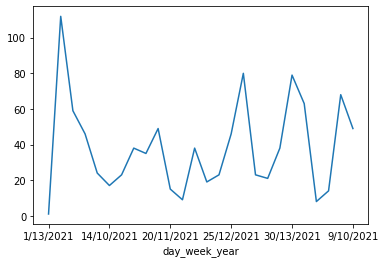

In [209]:
# for i in twitter_data.groupby(['day_week_year']).size():
#     print(i)
#     print(twitter_data.groupby(['day_week_year']).)
# # df.groupby('week_num').Category.value_counts()
grouped_by = twitter_data.groupby(['day_week_year'])
print(grouped_by.size())
series = grouped_by.size()
series.plot()

In [213]:
tweets_by_date = twitter_data.groupby(['day_week_year']).sort
tweets_by_date

True

In [179]:
print(series.iat[1])
# for i in series:
#     print(i, series[i])
# series[0]
series[5]
for index, value in series.items():
    print(f"Index : {index}, Value : {value}")

112
Index : 1/13/2021, Value : 1
Index : 10/10/2021, Value : 112
Index : 11/10/2021, Value : 59
Index : 12/10/2021, Value : 46
Index : 13/10/2021, Value : 24
Index : 14/10/2021, Value : 17
Index : 15/11/2021, Value : 23
Index : 16/11/2021, Value : 38
Index : 17/11/2021, Value : 35
Index : 19/11/2021, Value : 49
Index : 20/11/2021, Value : 15
Index : 21/11/2021, Value : 9
Index : 22/12/2021, Value : 38
Index : 23/12/2021, Value : 19
Index : 24/12/2021, Value : 23
Index : 25/12/2021, Value : 46
Index : 26/12/2021, Value : 80
Index : 27/12/2021, Value : 23
Index : 28/12/2021, Value : 21
Index : 29/13/2021, Value : 38
Index : 30/13/2021, Value : 79
Index : 31/13/2021, Value : 63
Index : 6/9/2021, Value : 8
Index : 7/9/2021, Value : 14
Index : 8/10/2021, Value : 68
Index : 9/10/2021, Value : 49


In [203]:
frame = series.to_frame()

# Group By Day